In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import sklearn

/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/yunhongmin/.pyenv/versions/3.7.4/envs/data-science/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


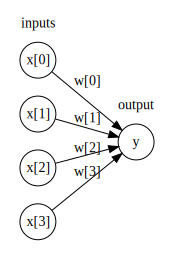

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

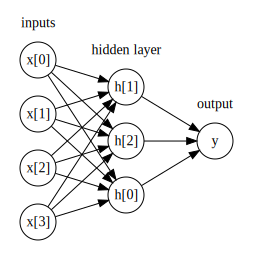

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

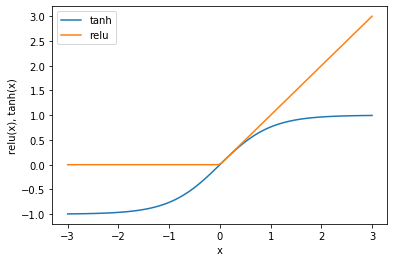

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

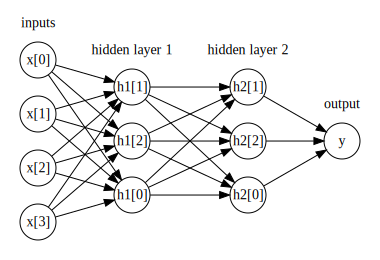

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature1')

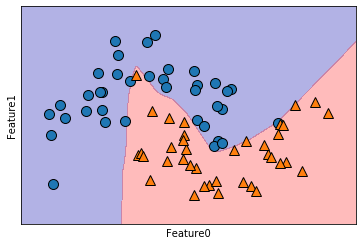

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# default nonlinearity is relu. 
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature0')
plt.ylabel('Feature1')



Text(0, 0.5, 'Feature1')

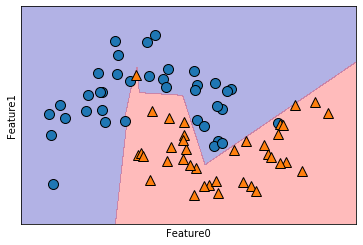

In [7]:
# number of hidden later is too large for this small dataset
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature0')
plt.ylabel('Feature1')

Text(0, 0.5, 'Feature1')

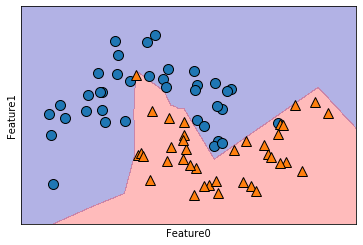

In [8]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature0')
plt.ylabel('Feature1')

Text(0, 0.5, 'Feature1')

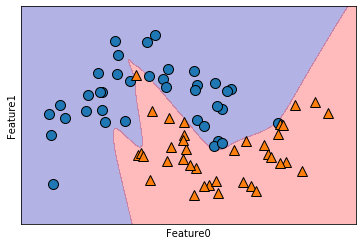

In [9]:
# using two hidden layers, with 10 units each, with tanh nonlinearity
mlp = MLPClassifier(
    solver='lbfgs', activation='tanh',
    random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature0')
plt.ylabel('Feature1')

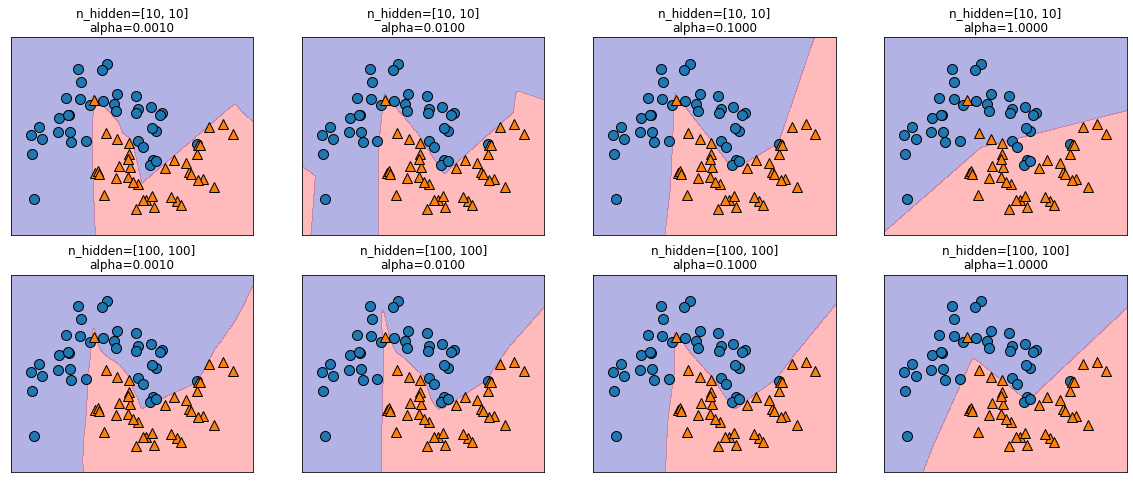

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(
            solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
            n_hidden_nodes, n_hidden_nodes, alpha ))

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Caner data per-feature maxima:\n{}'.format(cancer.data.max(axis=0)))

Caner data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.916084


In [13]:
# normalization
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.972028


In [14]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988263
Accuracy on test set: 0.972028


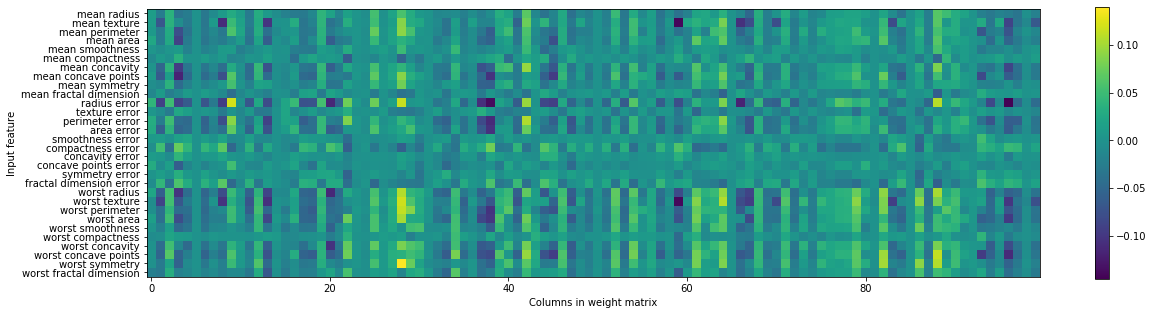

In [15]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()